In [1]:
from src.dataset import Raven
from src.model import VLM
from PIL import Image
import numpy as np
import requests
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
PATH = './dataset/RAVEN-10000/'
fig_types = ['center_single']

In [3]:
test_set = Raven(PATH, 'test', fig_types[0])
test_set.load_data()

Loading item: 0


In [4]:
net = VLM()

In [9]:
answers = []

for i in range(test_set.len()):
    puzzle = test_set.get_puzzle(i)
    puzzle_answers = {}
    for j, c_image in enumerate(puzzle):
        inter = {}
        inter['Angle'] = net.forward(c_image, 'At what angle is the figure located? The options are: -135, 90, -45, 0, 45, 90, 135, 180')
        inter['Color'] = net.forward(c_image, 'What is the color value of the figure? ')
        inter['Size'] = net.forward(c_image, 'What is the size of the figure? The options are: 0.4, 0.5, 0.6, 0.7, 0.8, 0.9')
        inter['Type'] = net.forward(c_image, 'What is the shape of the figure? The options are: triangle, square, pentagon, hexagon, circle')
        puzzle_answers[j] = inter
        
    answers.append(puzzle_answers)

In [10]:
print(answers[0])

{0: {'Angle': '45', 'Color': 'black', 'Size': '6', 'Type': 'circle'}, 1: {'Angle': '45', 'Color': 'black', 'Size': '6', 'Type': 'circle'}, 2: {'Angle': '45', 'Color': 'black', 'Size': '6', 'Type': 'circle'}, 3: {'Angle': '45', 'Color': 'black', 'Size': '6', 'Type': 'octagon'}, 4: {'Angle': '45', 'Color': 'black', 'Size': '6', 'Type': 'octagon'}, 5: {'Angle': '45', 'Color': 'black', 'Size': '6', 'Type': 'octagon'}, 6: {'Angle': '45', 'Color': 'black', 'Size': '6', 'Type': 'square'}, 7: {'Angle': '45', 'Color': 'black', 'Size': '6', 'Type': 'square'}, 8: {'Angle': '45', 'Color': 'black', 'Size': '6', 'Type': 'square'}, 9: {'Angle': '45', 'Color': 'black', 'Size': '6', 'Type': 'circle'}, 10: {'Angle': '45', 'Color': 'black', 'Size': '6', 'Type': 'triangle'}, 11: {'Angle': '90', 'Color': 'black', 'Size': '6', 'Type': 'square'}, 12: {'Angle': '90', 'Color': 'black', 'Size': '6', 'Type': 'square'}, 13: {'Angle': '90', 'Color': 'black', 'Size': '6', 'Type': 'square'}, 14: {'Angle': '90', 'Col

In [8]:
test_set.get_answers(0)

{0: {'Angle': '180', 'Color': 56, 'Size': 0.8, 'Type': 'circle'},
 1: {'Angle': '180', 'Color': 28, 'Size': 0.8, 'Type': 'circle'},
 2: {'Angle': '180', 'Color': 0, 'Size': 0.8, 'Type': 'circle'},
 3: {'Angle': '-135', 'Color': 112, 'Size': 0.5, 'Type': 'hexagon'},
 4: {'Angle': '-135', 'Color': 84, 'Size': 0.5, 'Type': 'hexagon'},
 5: {'Angle': '-135', 'Color': 56, 'Size': 0.5, 'Type': 'hexagon'},
 6: {'Angle': '180', 'Color': 196, 'Size': 0.9, 'Type': 'square'},
 7: {'Angle': '180', 'Color': 168, 'Size': 0.9, 'Type': 'square'},
 8: {'Angle': '180', 'Color': 140, 'Size': 0.7, 'Type': 'square'},
 9: {'Angle': '180', 'Color': 140, 'Size': 0.9, 'Type': 'circle'},
 10: {'Angle': '180', 'Color': 140, 'Size': 0.9, 'Type': 'triangle'},
 11: {'Angle': '180', 'Color': 224, 'Size': 0.9, 'Type': 'square'},
 12: {'Angle': '180', 'Color': 140, 'Size': 0.8, 'Type': 'square'},
 13: {'Angle': '180', 'Color': 140, 'Size': 0.9, 'Type': 'square'},
 14: {'Angle': '180', 'Color': 112, 'Size': 0.9, 'Type':

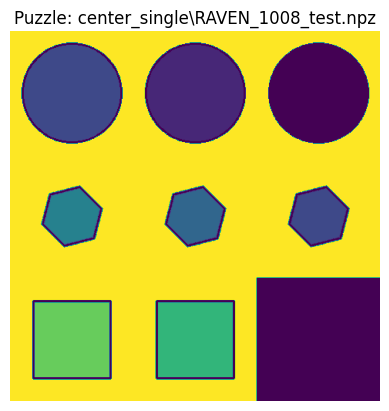

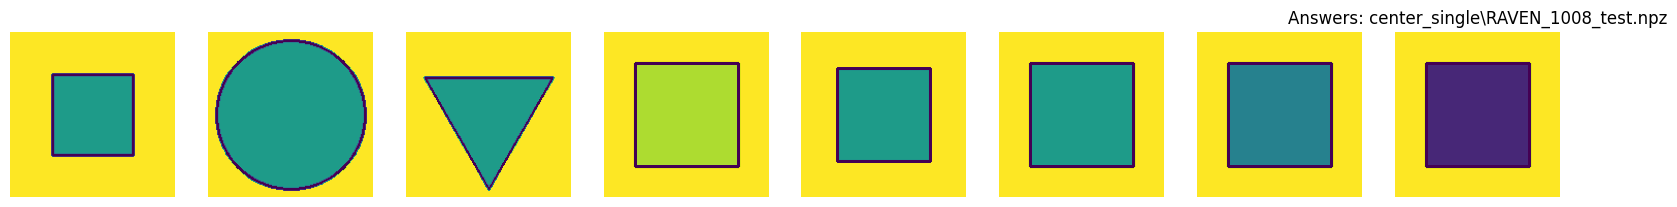

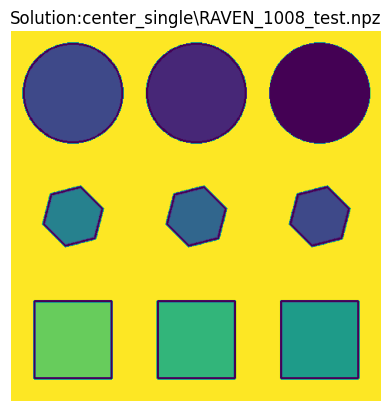

In [11]:
test_set.plot_puzzle(0)